In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
import json

from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms.classifiers import PegasosQSVC, QSVC
from qiskit_machine_learning.kernels import QuantumKernel

import time
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 20]
%config InlineBackend.figure_format = 'retina'

In [2]:
algorithm_globals.random_seed = 10598

In [3]:
data = load_breast_cancer(as_frame = True)

X_data = pd.DataFrame(data.data)
Y_data = pd.DataFrame(data.target)

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
list(data.target_names)

['malignant', 'benign']

In [6]:
X_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
Y_data.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [8]:
X_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
X_data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [10]:
X_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## Univariable plots

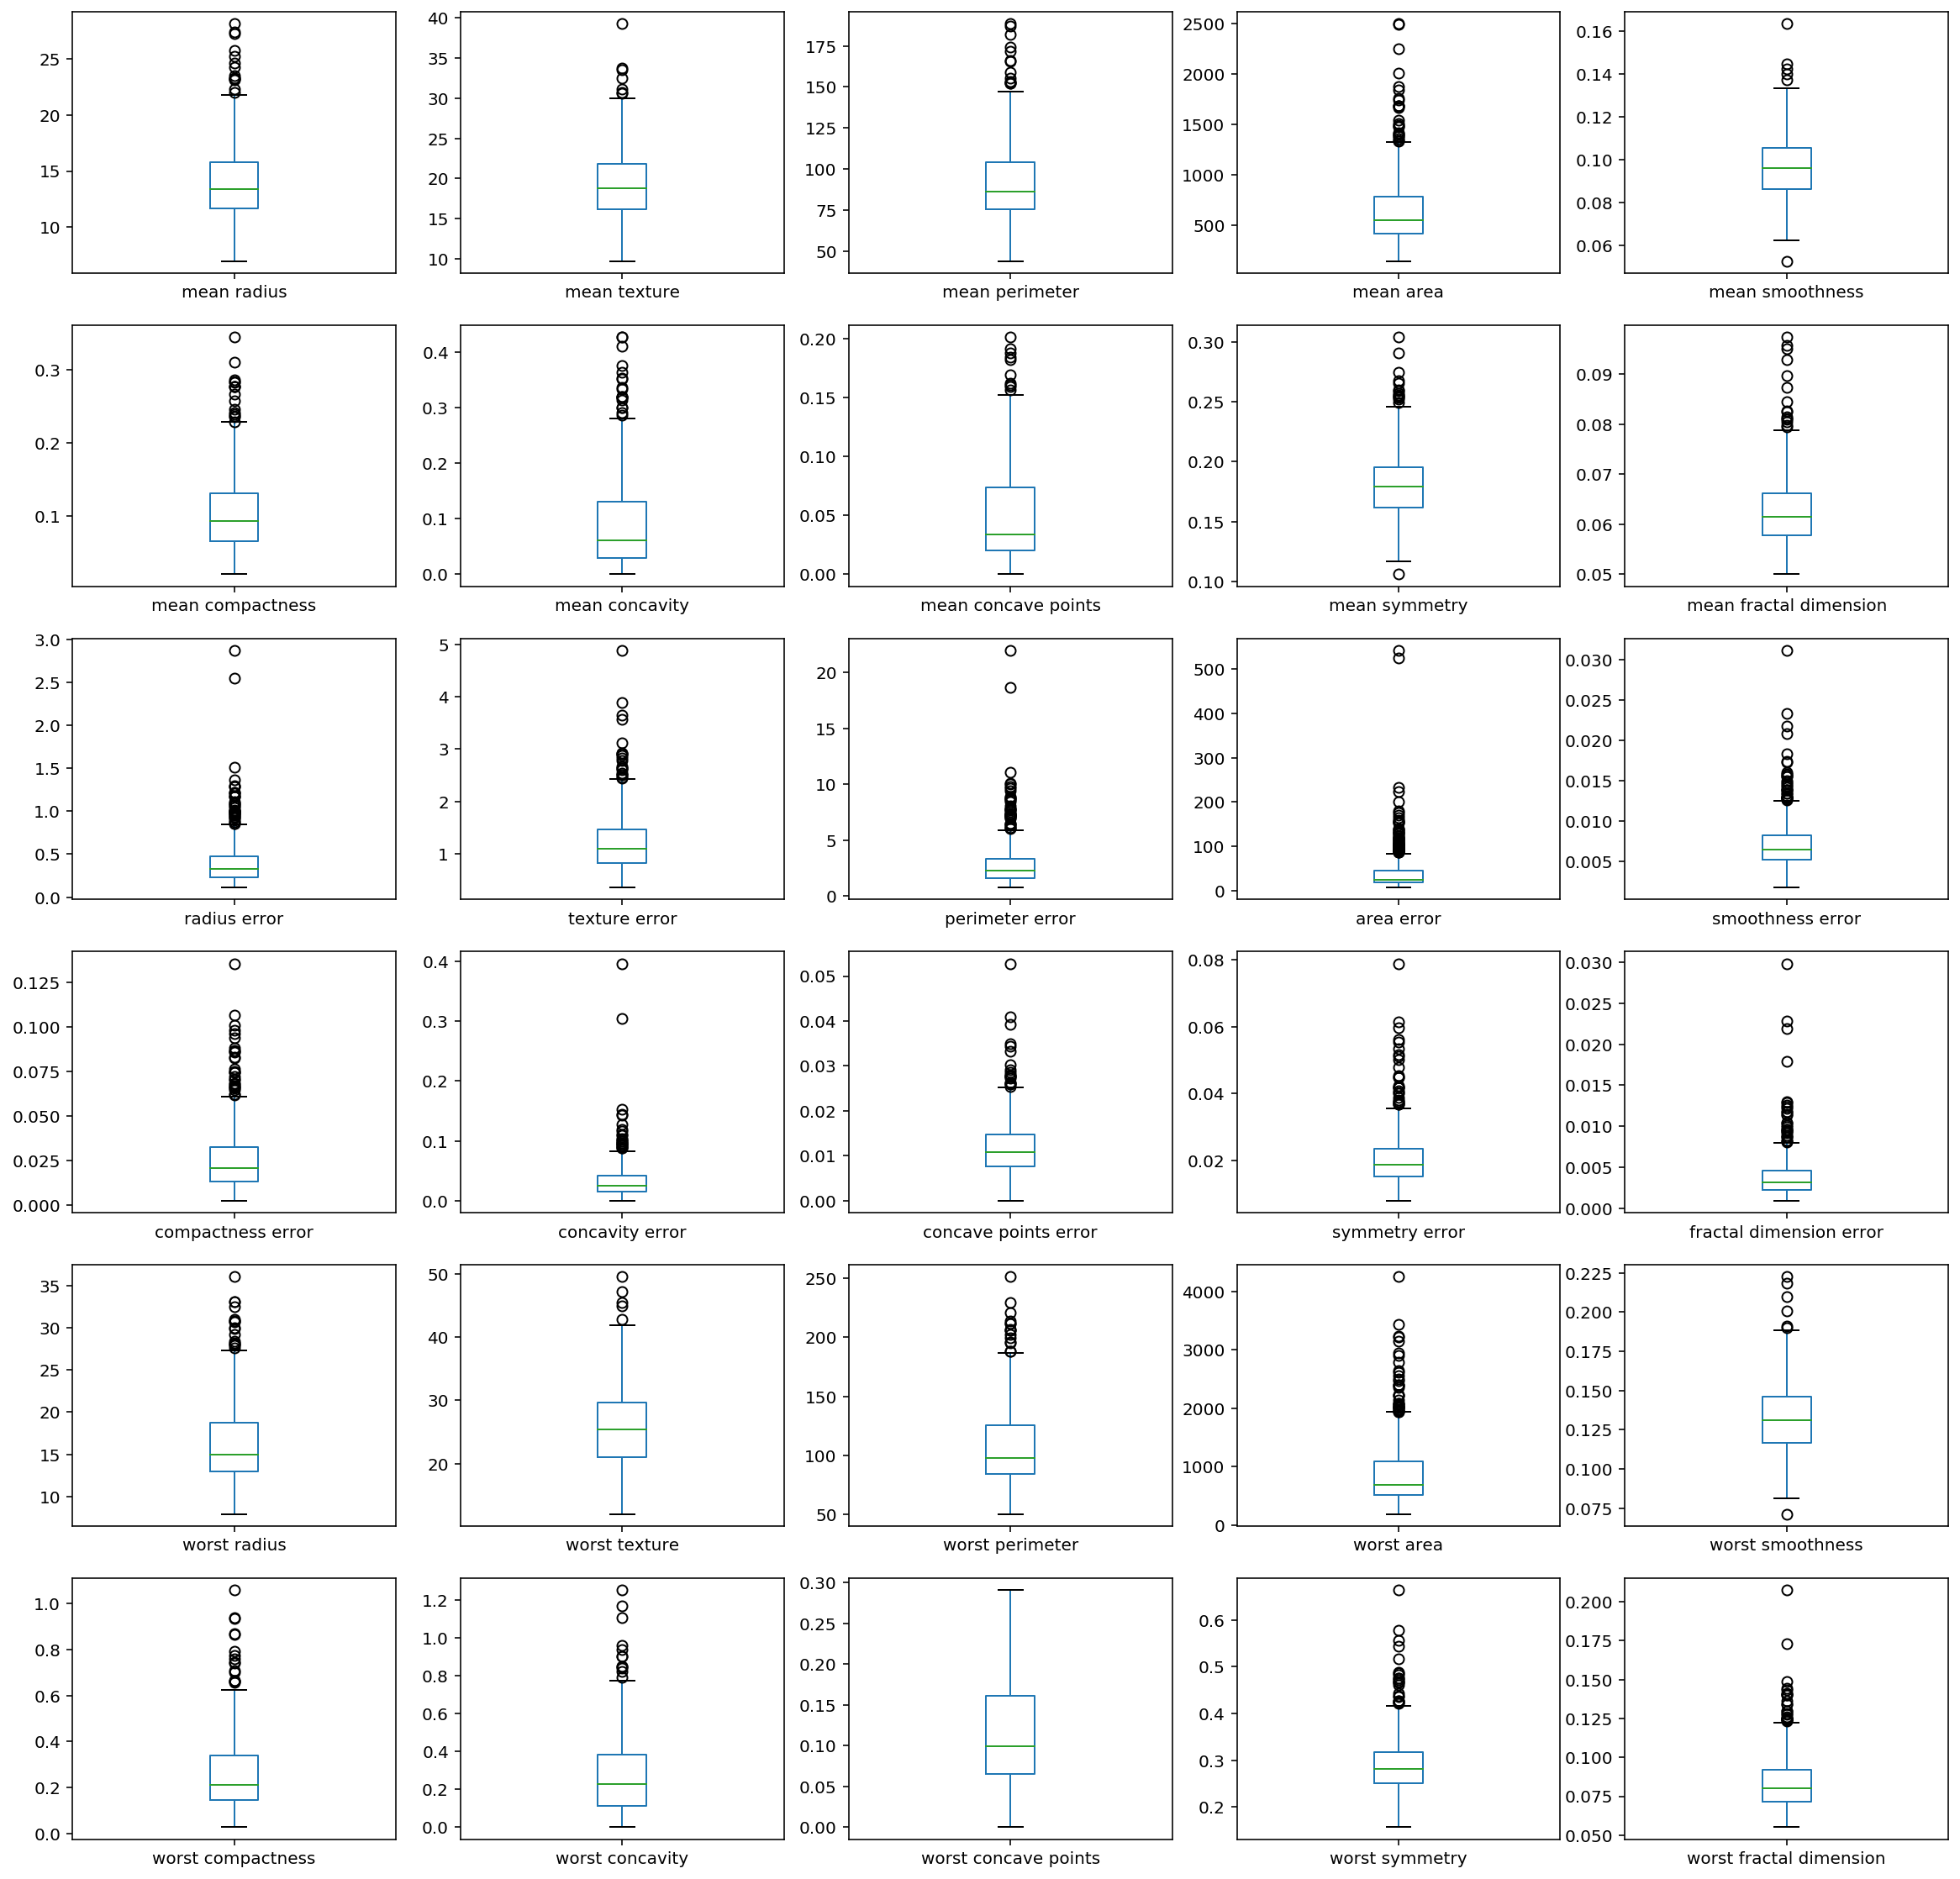

In [11]:
# box and whisker plots
X_data.plot(kind='box', subplots=True, layout=(6,5), sharex=False, sharey=False)
plt.show()

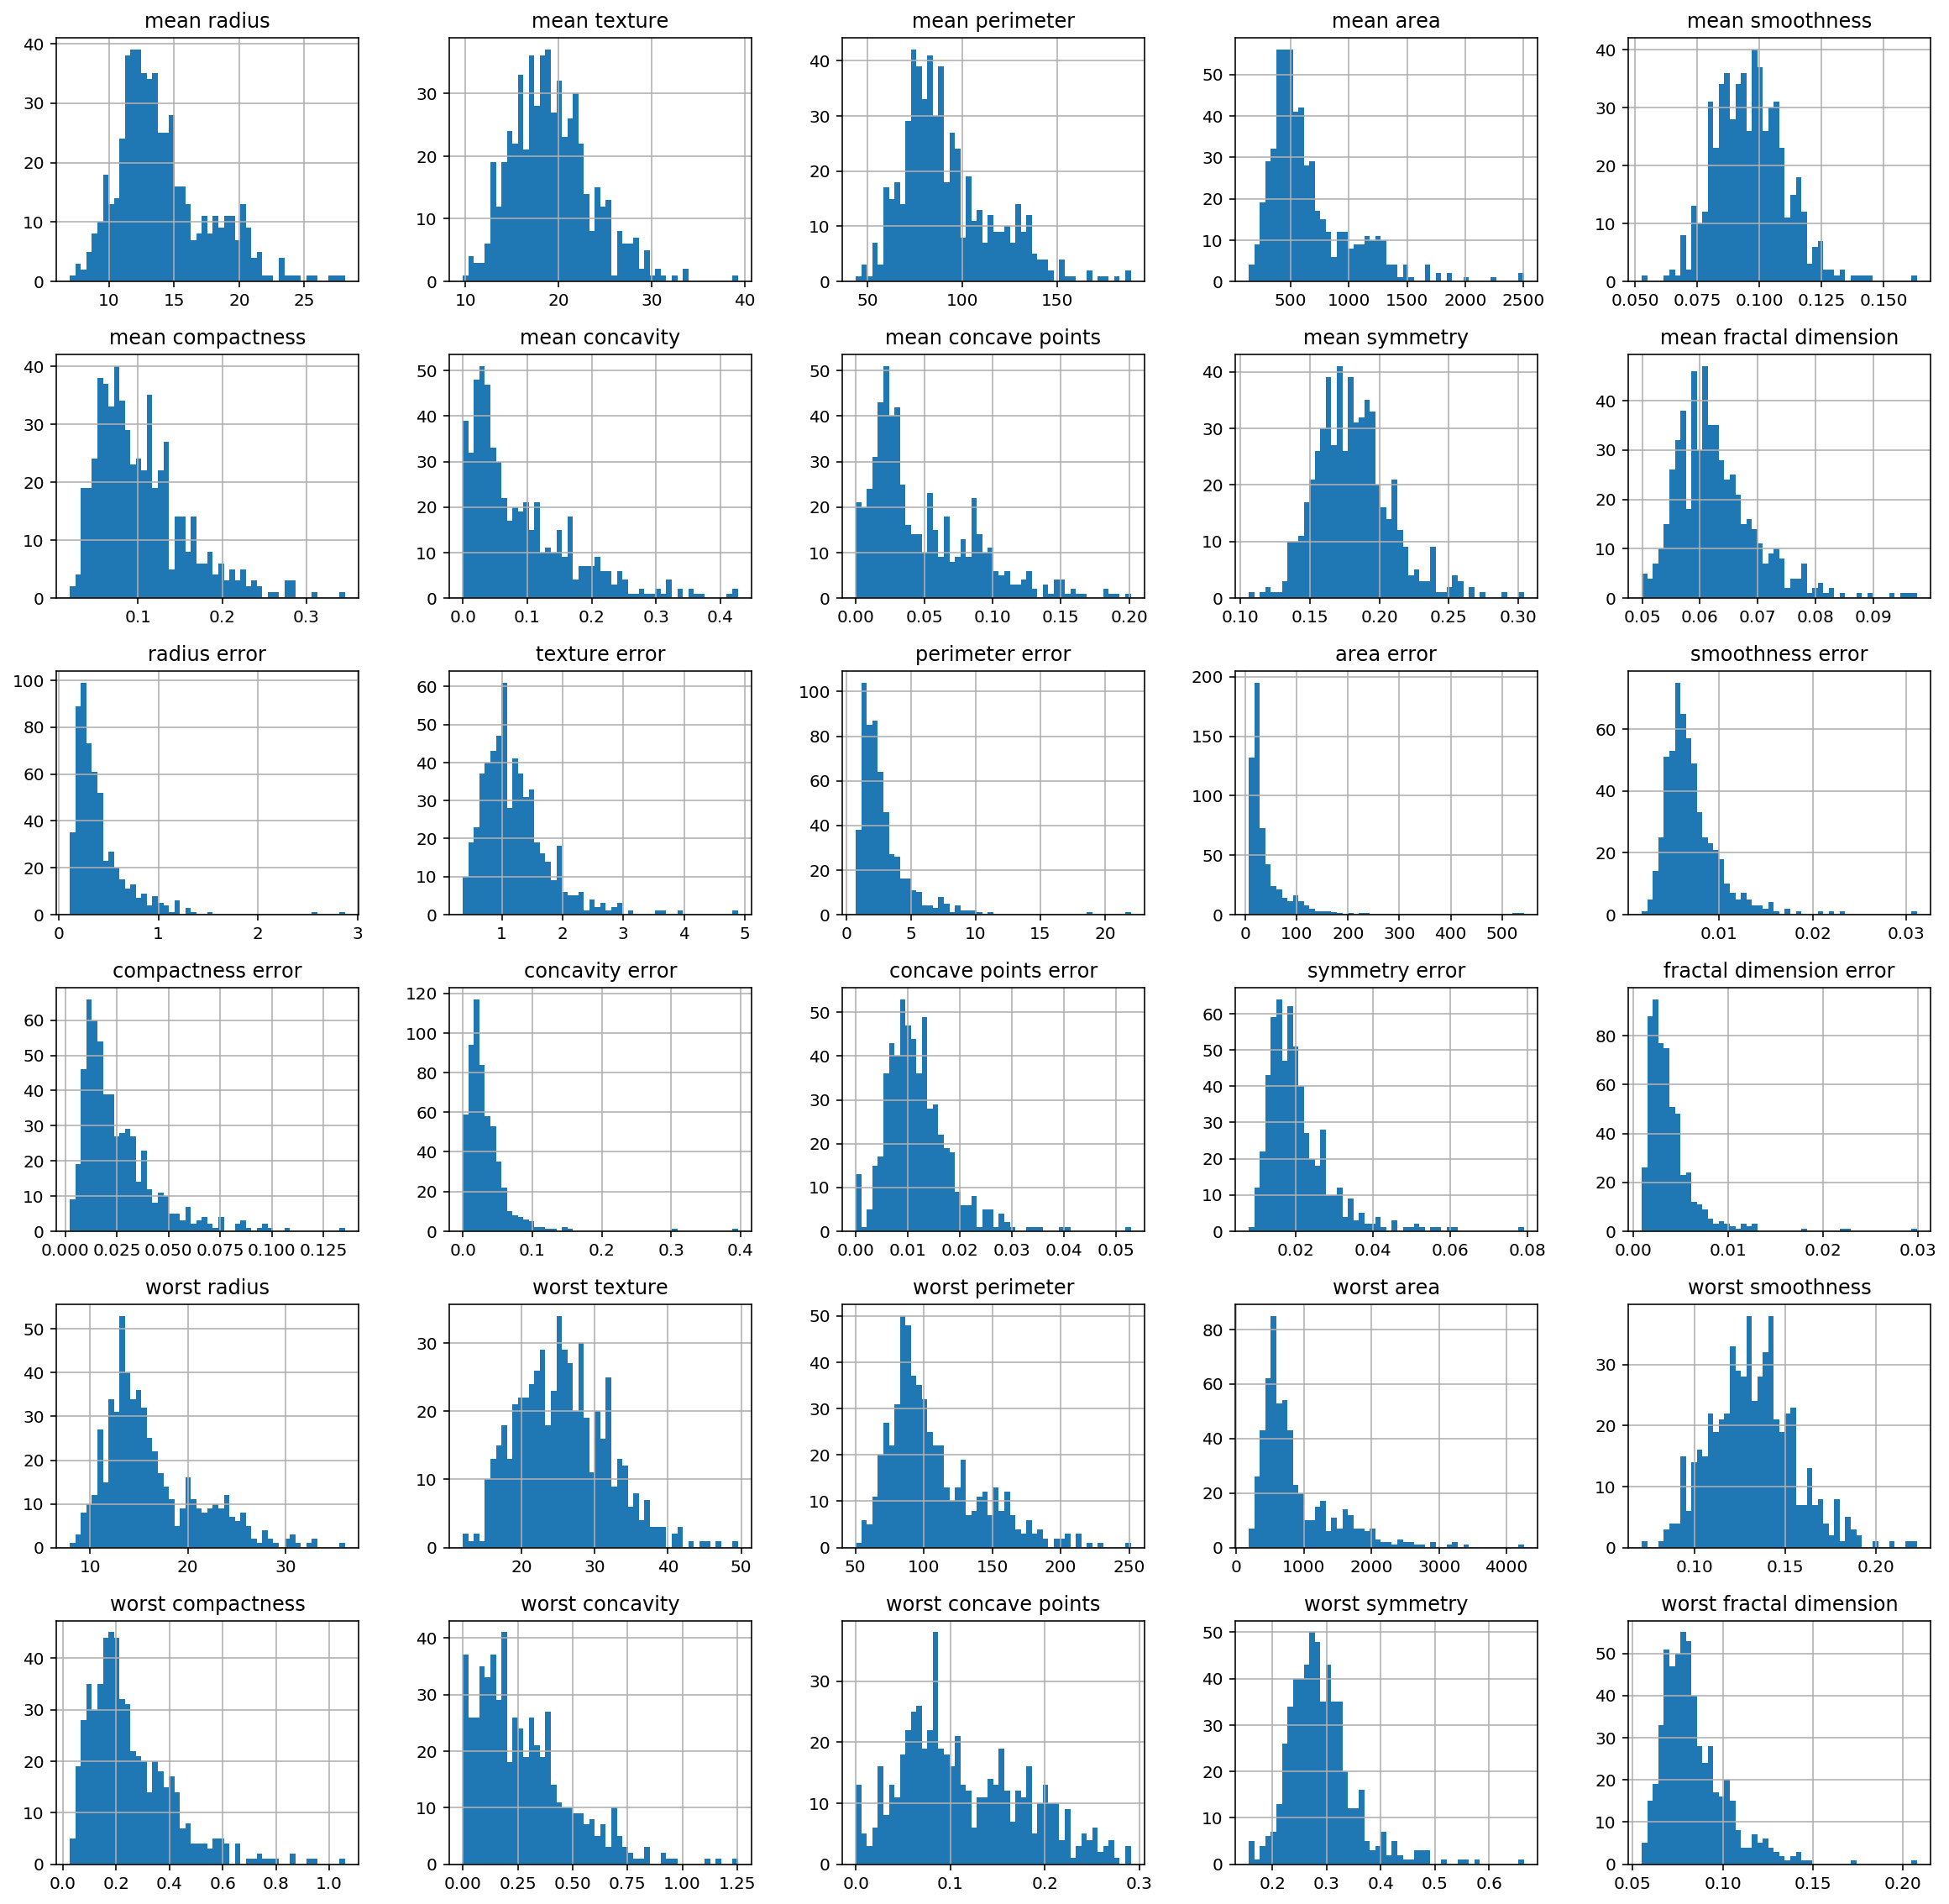

In [12]:
X_data.hist(bins = 50)
plt.show()

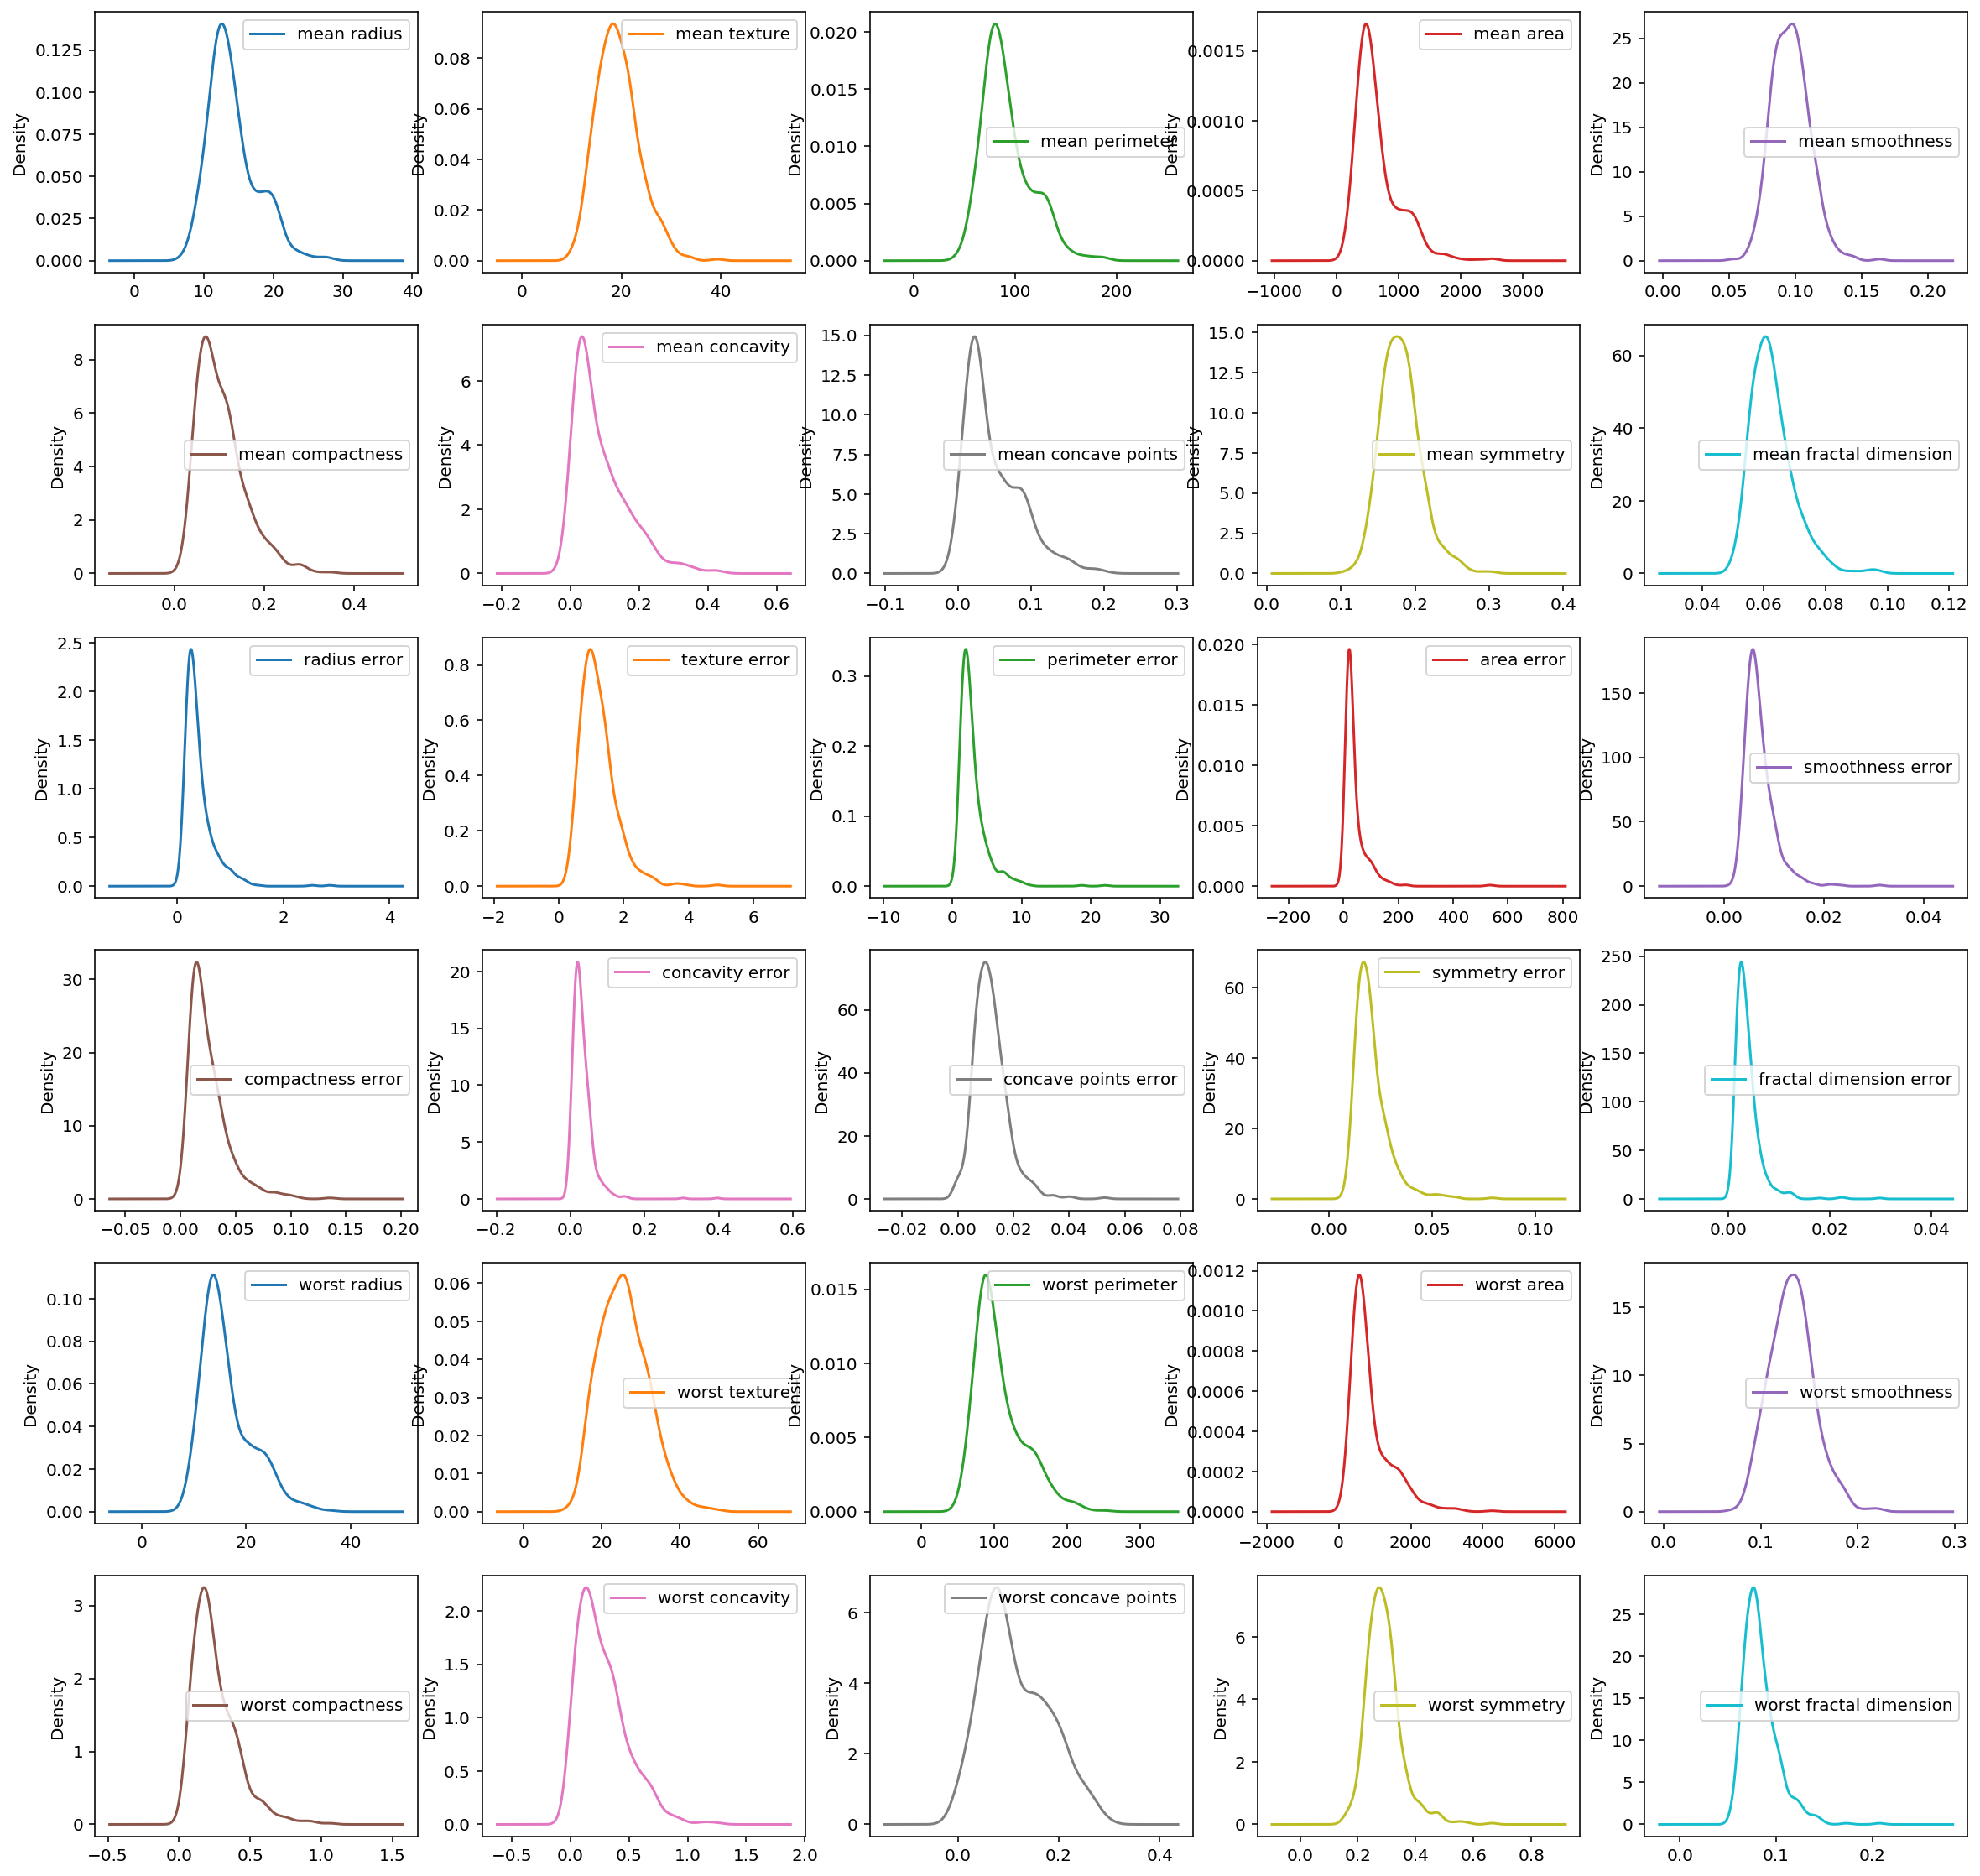

In [13]:
X_data.plot(kind='density', subplots=True, layout=(6,5), sharex=False, sharey=False)
plt.show()

# Classical Algorithms Evaluation

In [14]:
validation_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=validation_size, random_state=seed)

In [15]:
X_train.shape

(455, 30)

In [16]:
X_test.shape

(114, 30)

In [17]:
Y_train.shape

(455, 1)

In [18]:
Y_test.shape

(114, 1)

In [19]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.947005 (0.040051)
LDA: 0.958019 (0.027148)
KNN: 0.936232 (0.045443)
CART: 0.931739 (0.041298)
NB: 0.933720 (0.041136)
SVM: 0.907295 (0.057778)


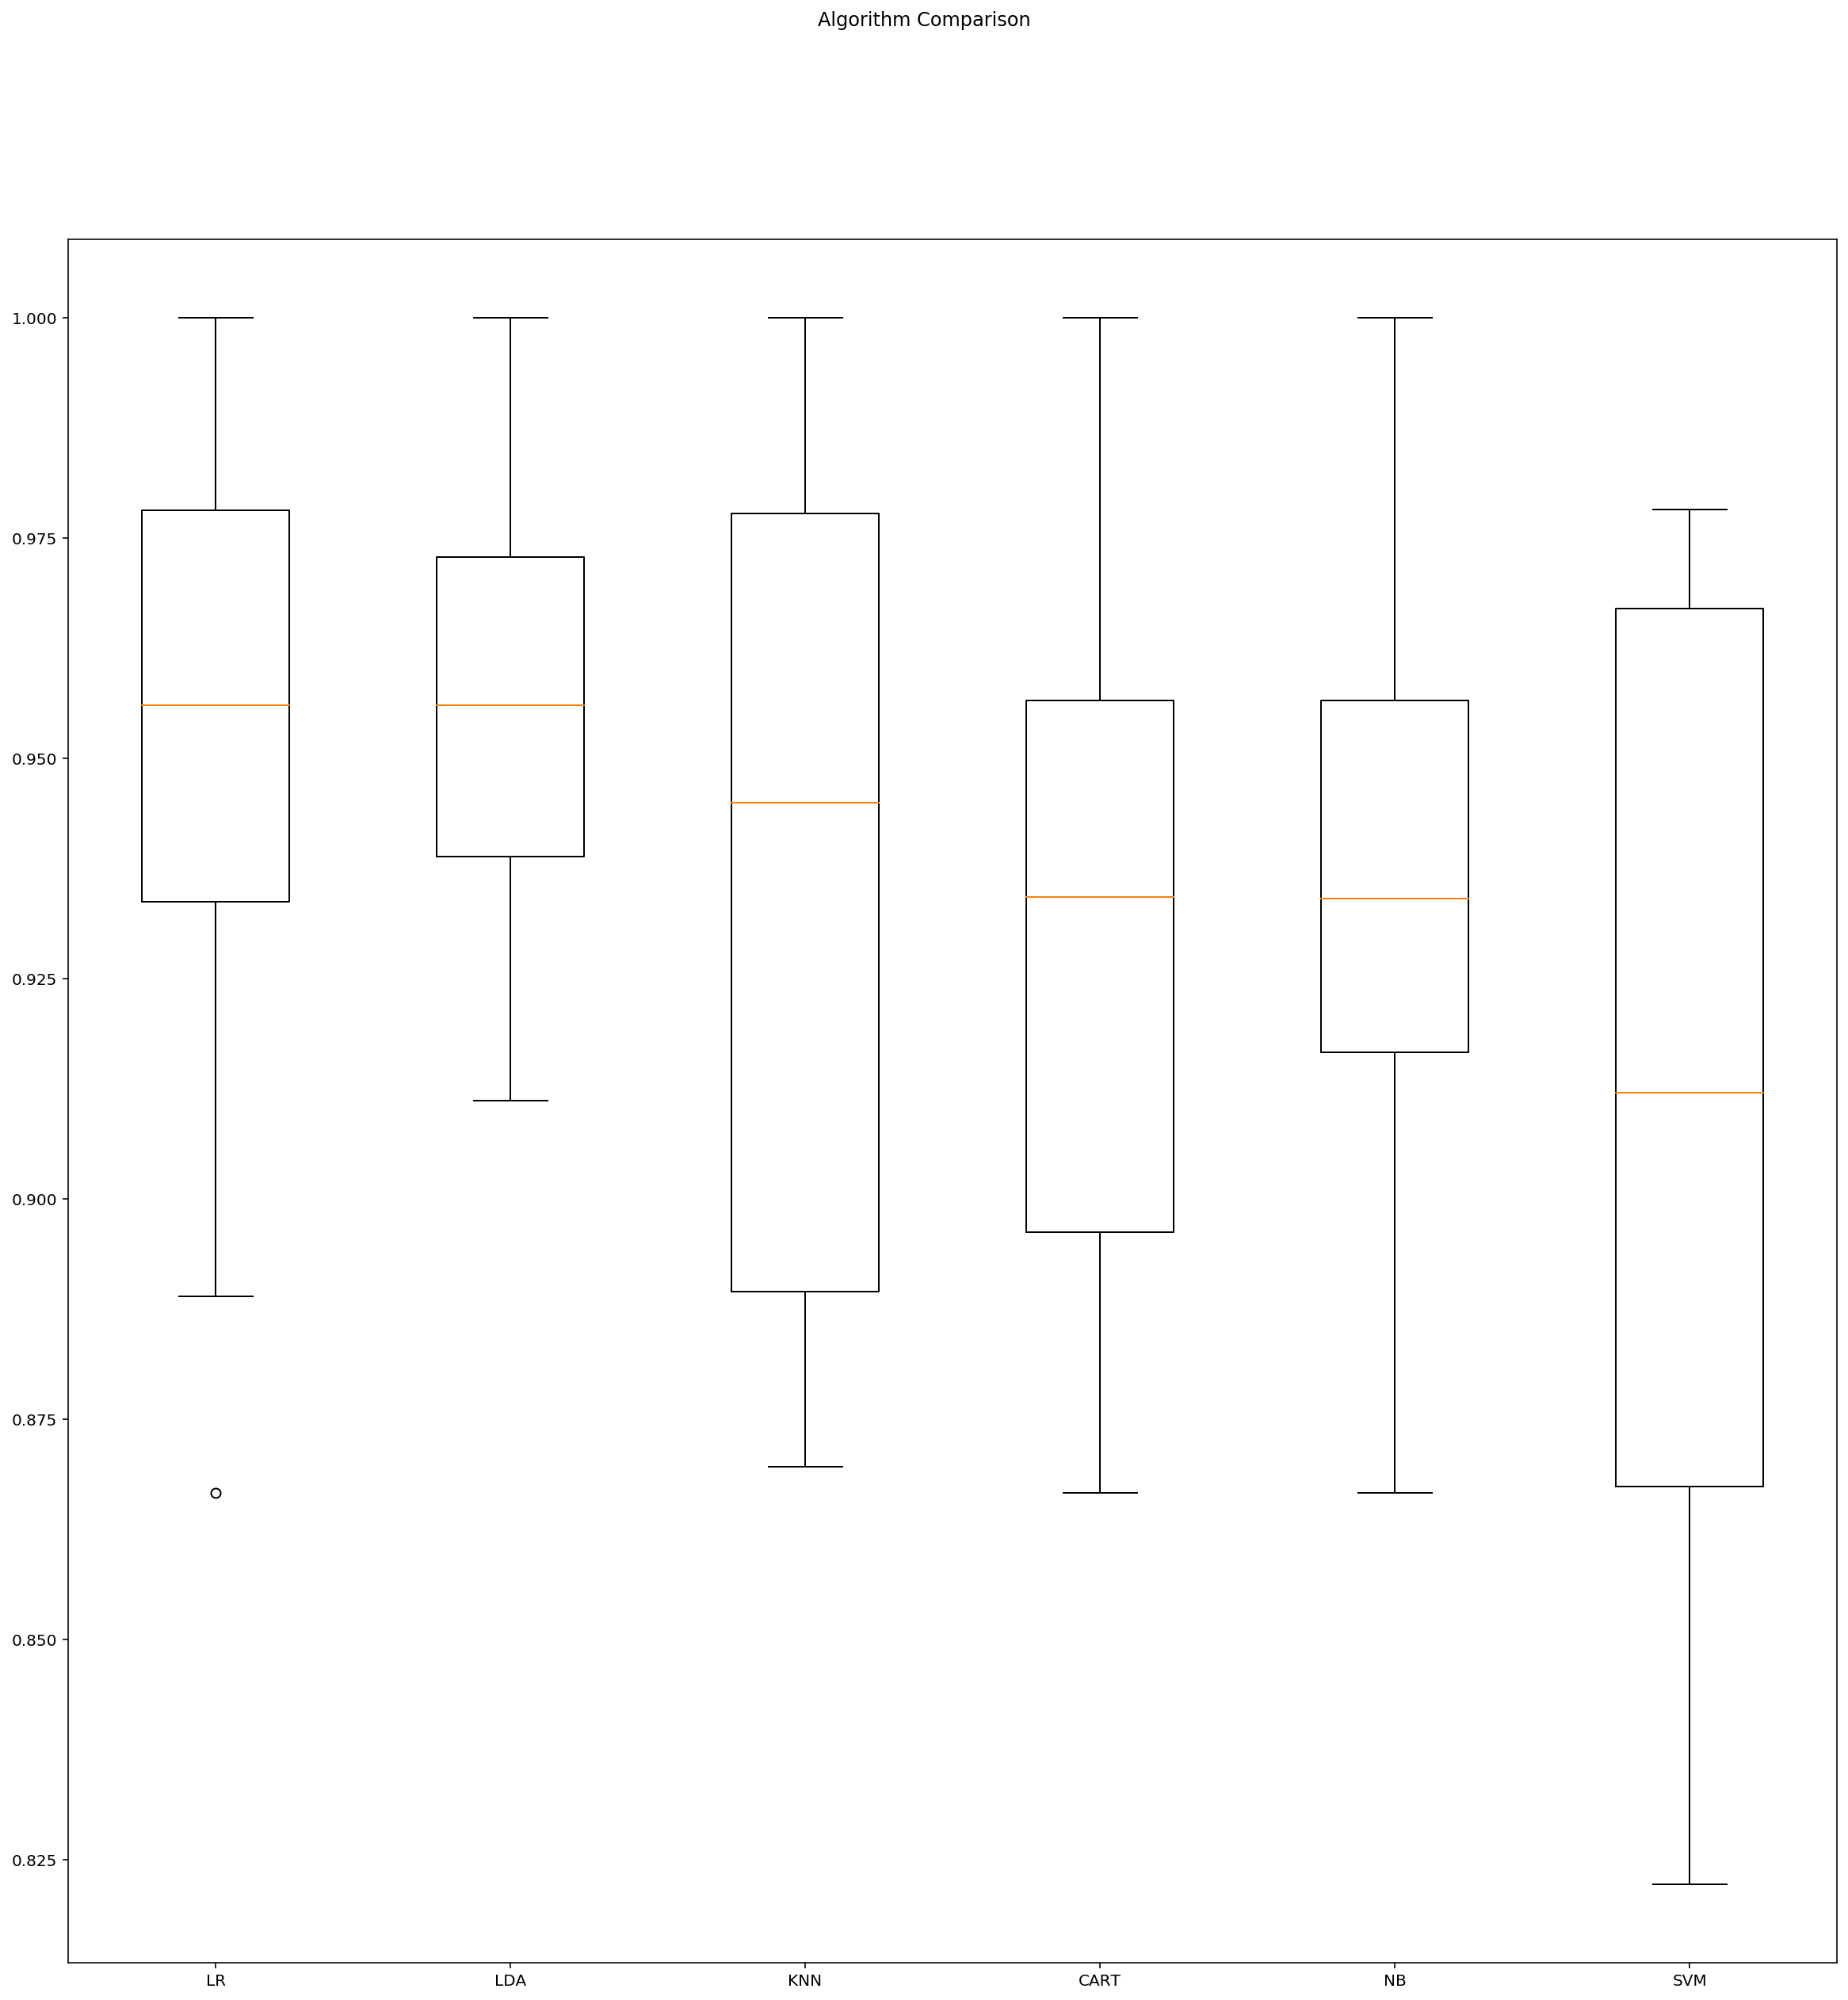

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)

print("Model accuracy: {:.2f}%".format(accuracy*100))
print("")
print(confusion_matrix(Y_test, predictions))
print("")
print(classification_report(Y_test, predictions))

Model accuracy: 95.61%

[[35  5]
 [ 0 74]]

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
           1       0.94      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



# Best predictors selection

In [22]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, Y_train)

In [23]:
scores = fit.scores_

In [24]:
combined = dict(zip(data.feature_names[:6], scores[:6]))
combined = dict(sorted(combined.items(), key=lambda x:x[1], reverse=True))

json_object = json.dumps(combined, indent = 4) 
print(json_object)

{
    "mean area": 44869.74104314177,
    "mean perimeter": 1656.303435635357,
    "mean radius": 220.76365336351492,
    "mean texture": 71.15470059907443,
    "mean compactness": 3.9081931977782753,
    "mean smoothness": 0.11402511126805381
}


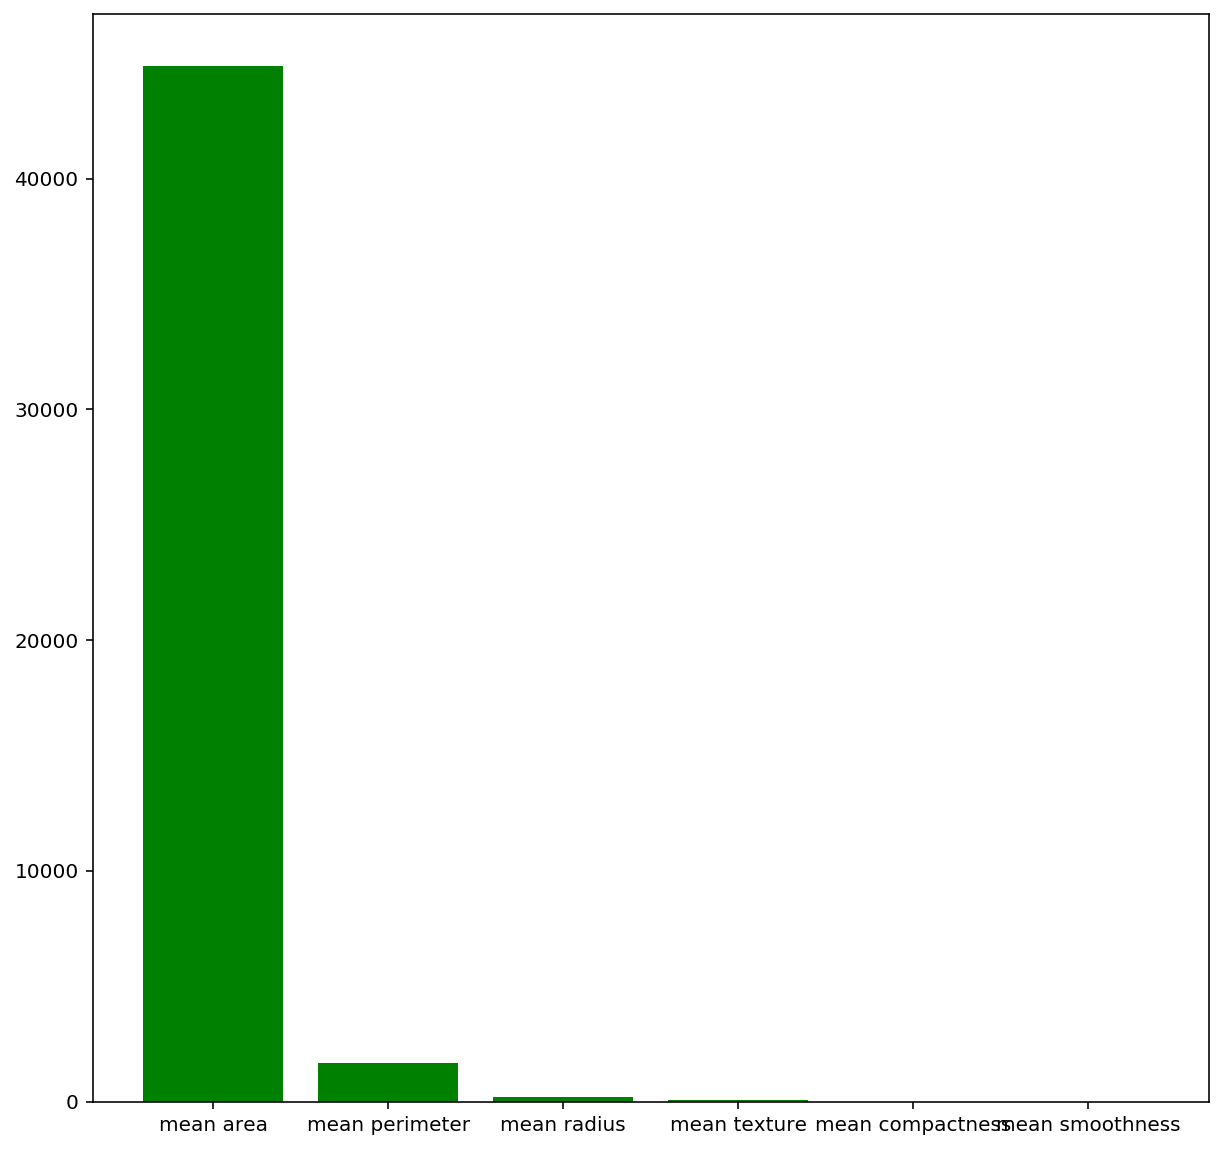

In [25]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.bar(combined.keys(), combined.values(), color='g')
plt.show()

# Pegasos Quantum Support Vector Classifier

In [39]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms.classifiers import PegasosQSVC
from qiskit_machine_learning.kernels import QuantumKernel

algorithm_globals.random_seed = 10598
seed = 7

In [40]:
data = load_breast_cancer(as_frame = True)

X_data = pd.DataFrame(data.data)
Y_data = pd.DataFrame(data.target)

In [41]:
#X_data_trunc = X_data.iloc[:, range(0,4)] # too much features, must truncate
X_data_trunc = X_data[['mean area','mean perimeter', 'mean radius', 'mean texture']] # too much features, must truncate

X_data_trunc = X_data_trunc[:200]

X_data_temp = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(X_data_trunc)
X_data_temp[:10]

array([[1.27885863, 1.79464417, 1.7088687 , 0.118052  ],
       [1.76355723, 2.02405698, 2.10934841, 1.42014788],
       [1.58011745, 1.95818598, 1.97275068, 2.03331347],
       [0.36180887, 0.76751078, 0.68904243, 1.88002208],
       [1.7203072 , 2.07402809, 2.0658855 , 0.81579215],
       [0.49752448, 0.88085434, 0.84892387, 1.05542008],
       [1.33702246, 1.72195893, 1.74922712, 1.80954327],
       [0.64785561, 1.05416322, 1.04450699, 1.95931073],
       [0.56120642, 0.99283504, 0.93429745, 2.13374577],
       [0.49573482, 0.91265413, 0.85047612, 2.52490313]])

In [42]:
Y_data_temp = np.array(Y_data[:200])[:,0]
Y_data_temp.shape

(200,)

In [43]:
X_data_temp.shape

(200, 4)

In [44]:
features = X_data_trunc.shape[1]
features

4

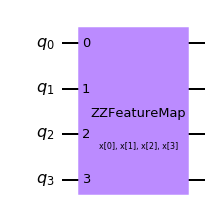

In [45]:
feature_map = ZZFeatureMap(feature_dimension = features, reps = 2, entanglement = 'full')
feature_map.draw('mpl')

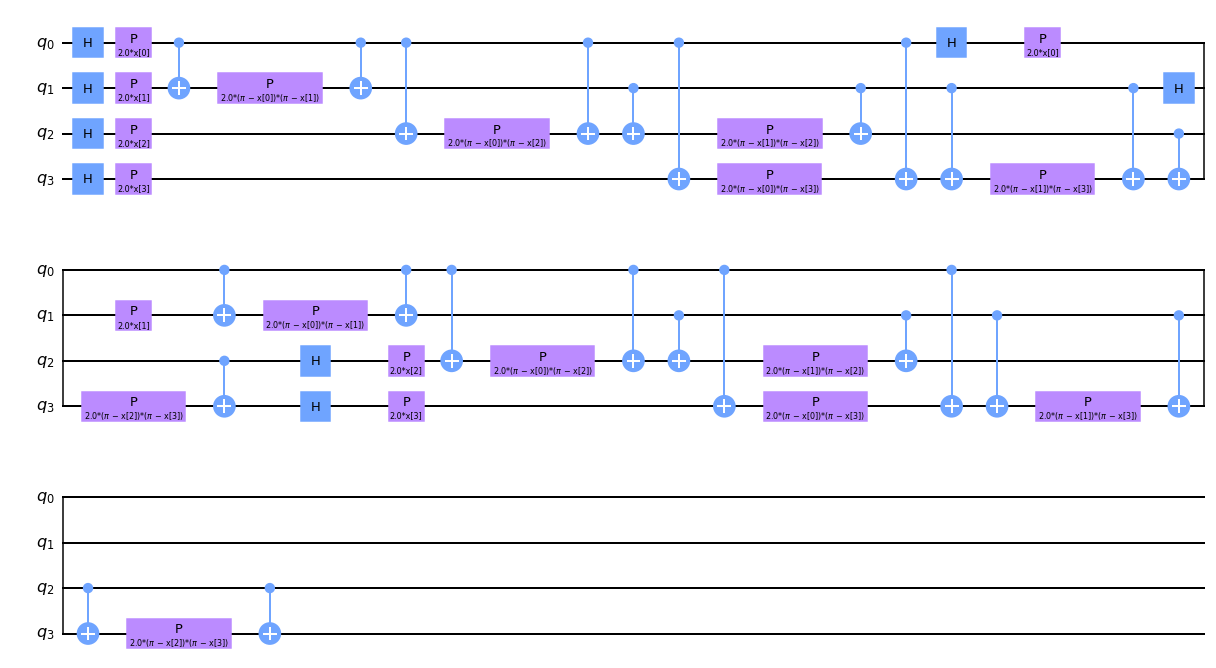

In [46]:
feature_map.decompose().draw('mpl')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_data_temp, Y_data_temp, test_size=0.2, shuffle = False)

In [49]:
quantum_instance = QuantumInstance(
    Aer.get_backend("statevector_simulator"),
    shots=1,
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)

In [50]:
quantum_kernel = QuantumKernel(feature_map = feature_map, quantum_instance = quantum_instance)

In [51]:
# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

pegasos_svm = PegasosQSVC(quantum_kernel = quantum_kernel, C = C, num_steps = tau)
pegasos_svm.seed = seed

In [52]:
pegasos_svm.fit(X_train, y_train)

PegasosQSVC(C=1000, num_steps=100,
            quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x0000015BFD5D1F88>,
            seed=7)

In [53]:
print("Train score: ", pegasos_svm.score(X_train, y_train))
print("Test score: ", pegasos_svm.score(X_test, y_test))

Train score:  0.7
Test score:  0.7


## QSVC

In [42]:
qsvm = QSVC(quantum_kernel = quantum_kernel)

In [43]:
qsvm.fit(X_train, y_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x0000024EF622E488>,
     random_state=7, shrinking=True, tol=0.001, verbose=False)

In [44]:
print("Train score: ", qsvm.score(X_train, y_train))
print("Test score: ", qsvm.score(X_test, y_test))

Train score:  0.89375
Test score:  0.775


In [45]:
import qiskit_machine_learning
qiskit_machine_learning.__version__

'0.4.0'